In [1]:
import numpy as np
import pandas as pd
import math
from scipy.optimize import curve_fit
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


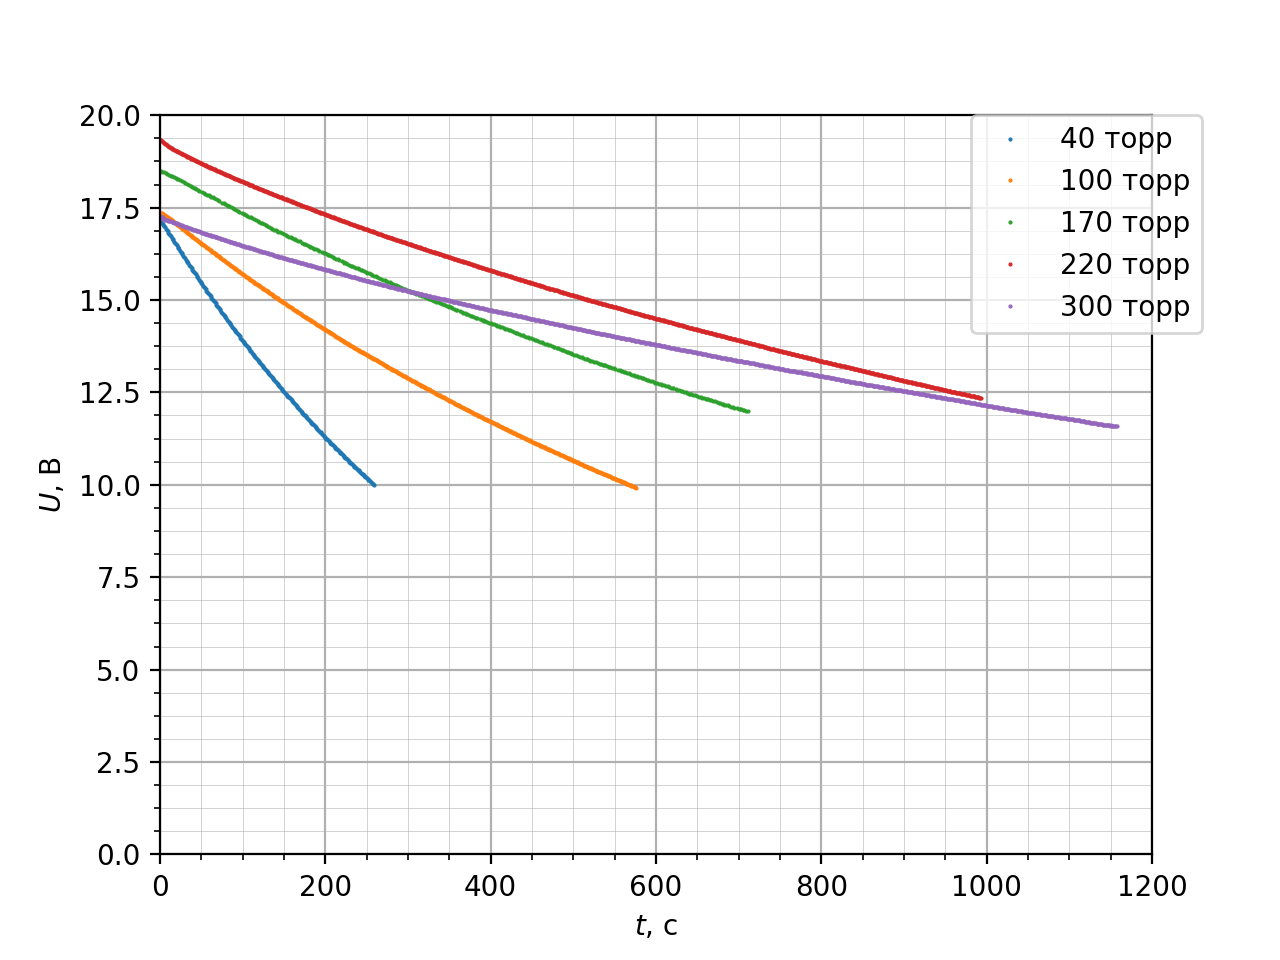

In [40]:
values = [40, 100, 170, 220, 300]
data = []

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.xlabel('$t$, c')
plt.ylabel('$U$, В')
plt.xlim(0, 1200)
plt.ylim(0, 20)
for x in values:
    p = pd.read_csv('p' + str(x) + '.csv', header=0)
    p = np.transpose(np.array(p))
    data.append(p)
    plt.plot(p[0], p[1], linestyle='', marker='.', markersize='1', label=(str(x)+' торр'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)

<IPython.core.display.Javascript object>


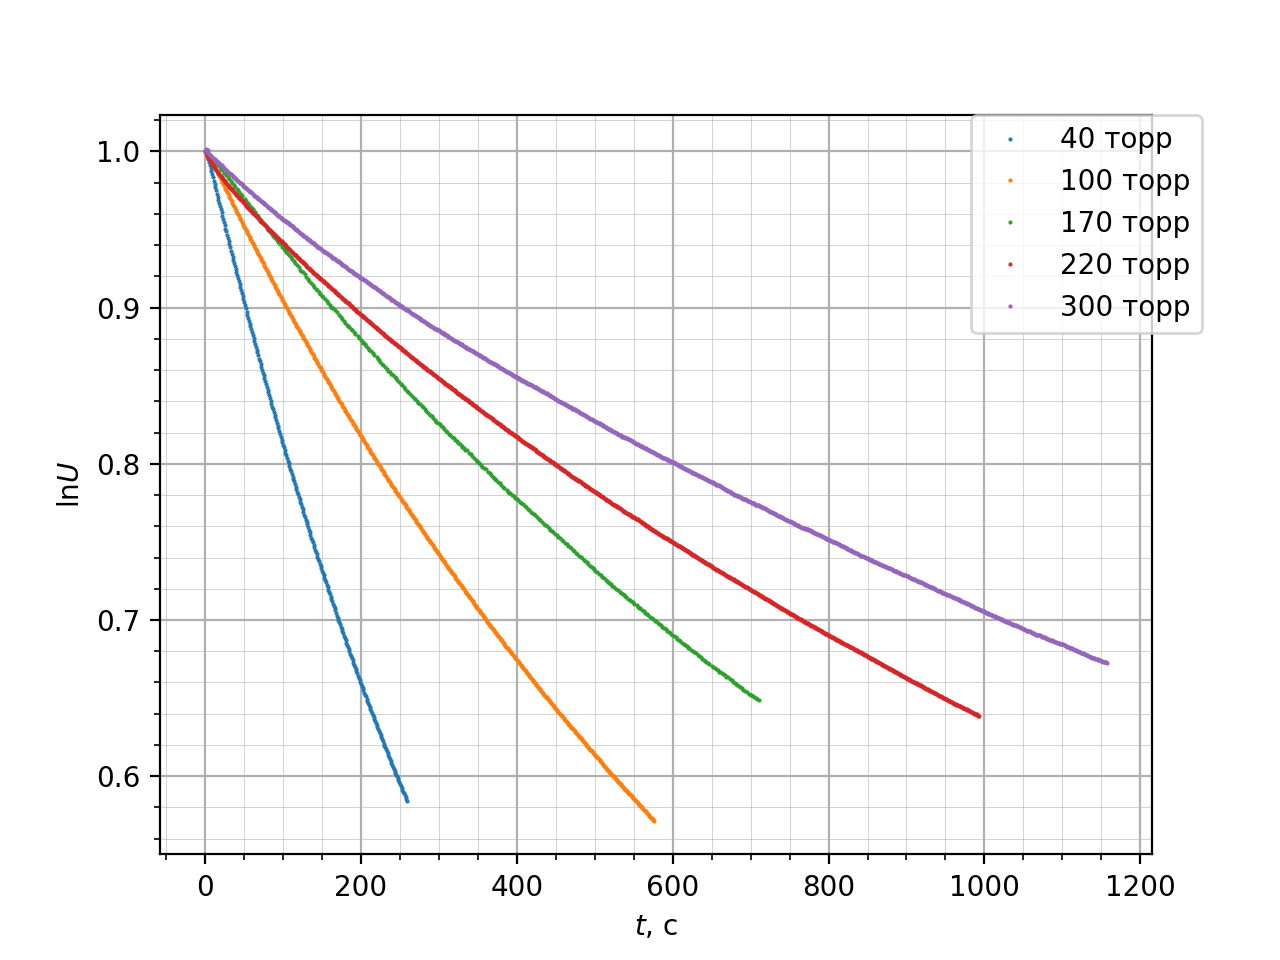

In [41]:
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.xlabel('$t$, c')
plt.ylabel('$\ln U$')
for i in range(len(data)):
    data[i][1] /= data[i][1][0]
    plt.plot(data[i][0], data[i][1], linestyle='', marker='.', markersize='1', label=(str(values[i])+' торр'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)

<IPython.core.display.Javascript object>


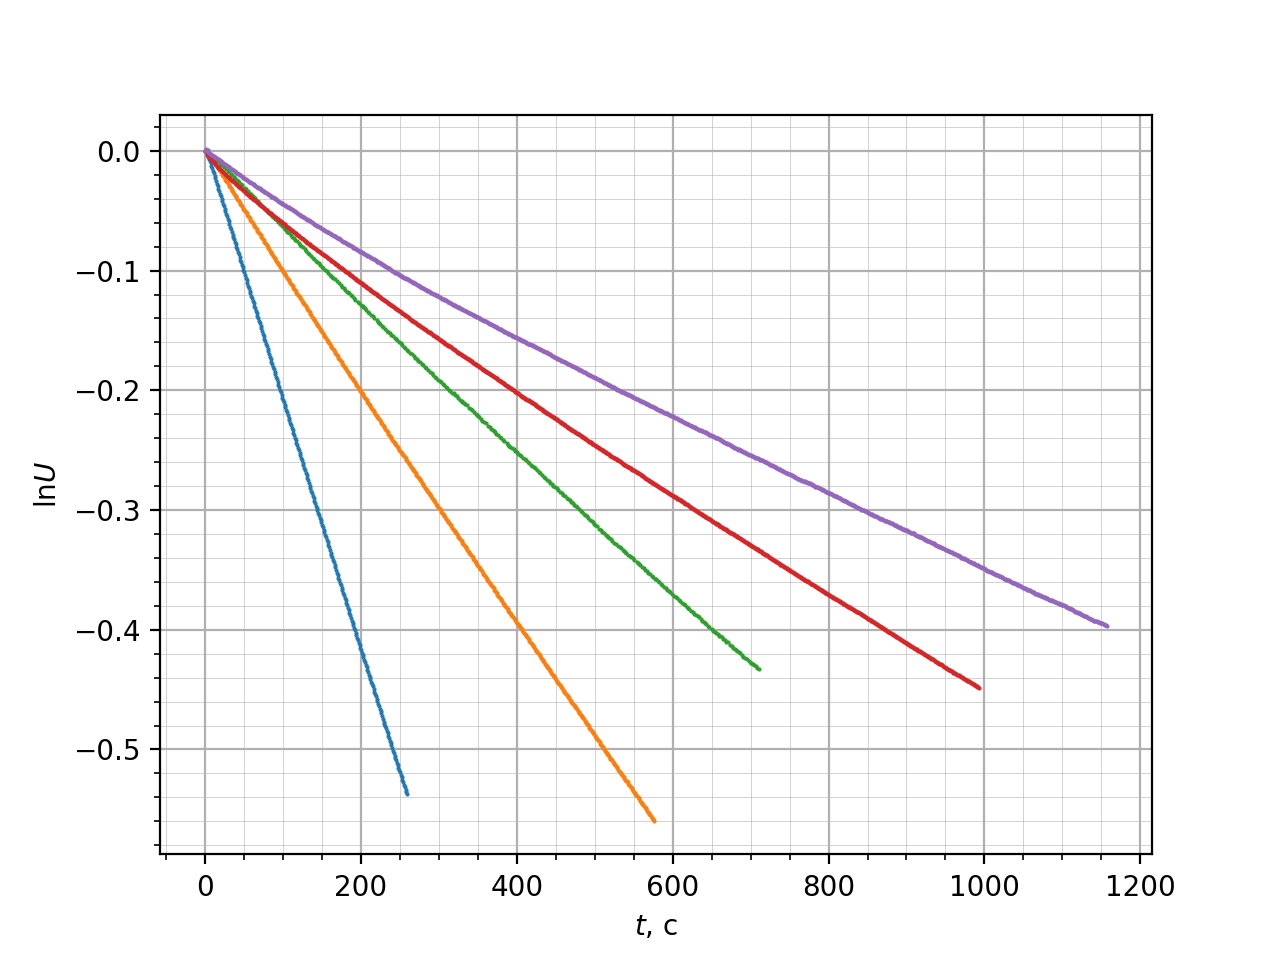

In [42]:
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.xlabel('$t$, c')
plt.ylabel('$\ln U$')
for d in data:
    plt.plot(d[0], np.log(d[1]), linestyle='', marker='.', markersize='1')

<IPython.core.display.Javascript object>


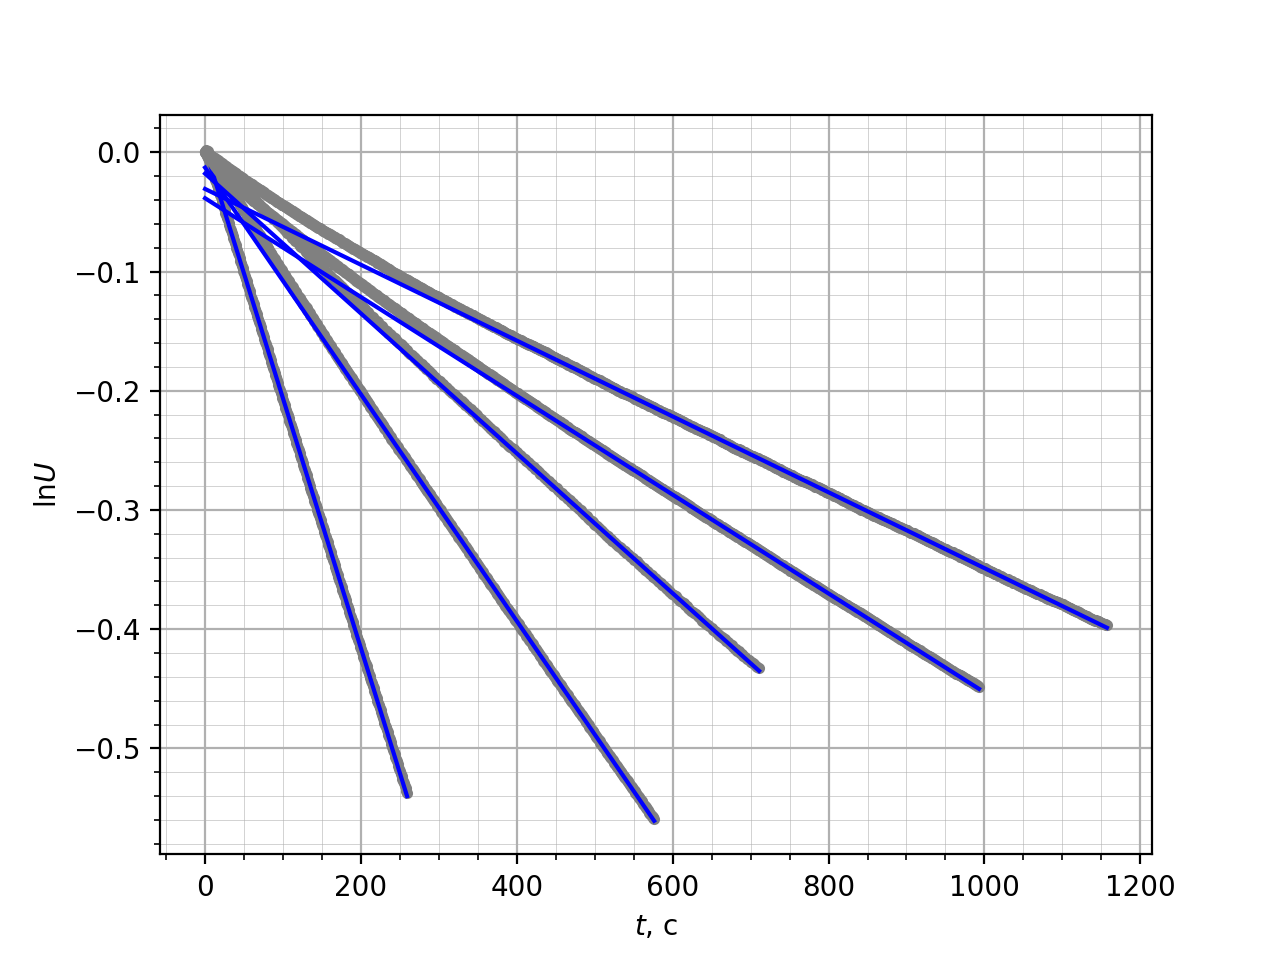

In [43]:
f = lambda x, a, b: a * x + b

data_opt = []
data_cov = []

r = [0, 200, 200, 400, 400]

plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.xlabel('$t$, c')
plt.ylabel('$\ln U$')
for i in range(len(data)):
    d = data[i]
    d_opt, d_cov = curve_fit(f, d[0][r[i]:], np.log(d[1][r[i]:]))
    data_opt.append(d_opt)
    data_cov.append(d_cov)
    plt.plot(d[0], np.log(d[1]), linestyle='', marker='.', color='grey')
    plt.plot(d[0], f(d[0], *d_opt), color='blue')

In [44]:
data_opt, data_cov

([array([-0.00209532,  0.00295767]),
  array([-0.00095105, -0.01281588]),
  array([-0.00058684, -0.01783898]),
  array([-0.00041447, -0.03850723]),
  array([-0.0003181 , -0.03070904])],
 [array([[ 8.15338816e-13, -1.05724766e-10],
         [-1.05724766e-10,  1.83026008e-08]]),
  array([[ 9.27698092e-14, -3.60101012e-11],
         [-3.60101012e-11,  1.50766618e-08]]),
  array([[ 4.98482746e-13, -2.76738579e-10],
         [-2.76738579e-10,  1.57750851e-07]]),
  array([[ 4.39042897e-14, -3.05826885e-11],
         [-3.05826885e-11,  2.25940912e-08]]),
  array([[ 1.77897028e-14, -1.38526965e-11],
         [-1.38526965e-11,  1.16387521e-08]])])

In [45]:
tau = [-1/d[0] for d in data_opt]
tau

[477.2538011454133,
 1051.4689681047073,
 1704.0449806498013,
 2412.699292543854,
 3143.625274079992]

# Далее все считаем в СИ

In [47]:
L_S = 1100 
V = 8e-4
D = [V * L_S / (2 * t) for t in tau]
D

[0.0009219413212508651,
 0.0004184621832379022,
 0.0002582091464699572,
 0.00018236835454785646,
 0.00013996579160624342]

<IPython.core.display.Javascript object>


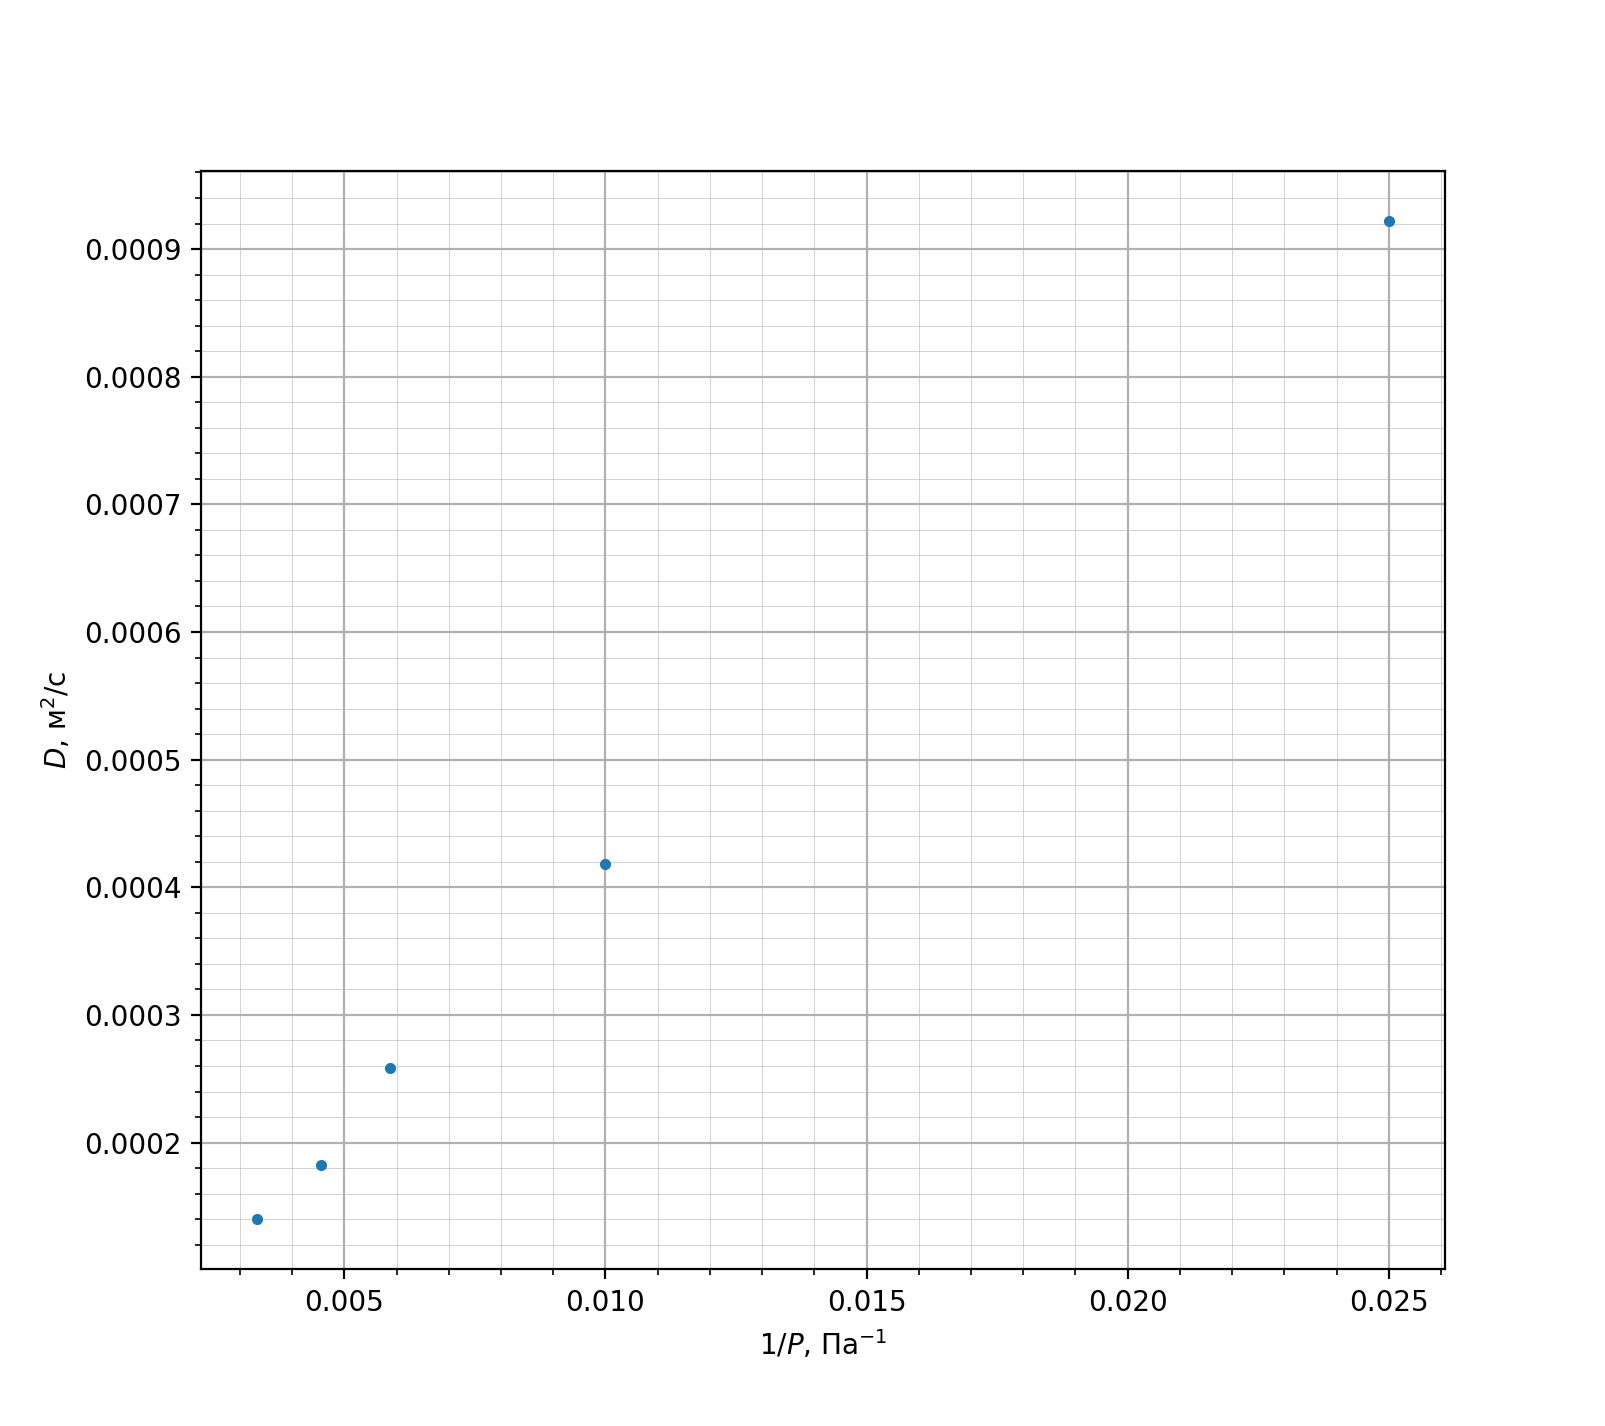

In [49]:
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linewidth='0.2')
plt.xlabel('$1/P$, Па$^{-1}$')
plt.ylabel('$D$, м$^2$/с')
plt.plot([1/p for p in values], D, linestyle='', marker='.')